In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.utils import io
from PyEyeSim import EyeData

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
Path='C:/Users/Utente/Documents/University/Courses/P1&P2/EyeMovementDat/'
FilePath=Path+'merged.csv'
FixData=pd.read_csv(FilePath, sep=',',header=0, dtype={'subject': str})
print(np.shape(FixData))

(265703, 12)


In [4]:
# delete every row where the repetition is not 0 and record_number is not 0
FixData=FixData[FixData['repetition']==0]
FixData=FixData[FixData['record_number']==0]
print(np.shape(FixData))

(258562, 12)


dataset size:  (258562, 12)
presentation size:  x= 1920 pixels y= 1080  pixels
presentation size:  x= 1920 pixels y= 1080  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
mean_x  not found !!, provide column as mean_x =YourColumn , default:  mean_x
mean_y  not found !!, provide column as mean_y =YourColumn , default:  mean_y
info found for 200 subjects, and 36 stimuli
sizecorrect =  True ; If stimulus not full screen, assume central presentation, use correction
run descriptive analysis
Data for  200 observers and  36  stimuli.


C:\Users\Utente\Documents\University\Master\PyEyeSim\PyEyeSim\__init__.py:281: UserWarning: Stim path not provided
  warnings.warn("Stim path not provided")


Mean fixation number:  36.89  +/-  9.95
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  7028
Mean X location:  476.5  +/-  92.1  pixels
Mean Y location:  465.2  +/-  65.3  pixels
Mean saccade  amplitude:  79.9  +/-  19.2  pixels
Mean scanpath  length:  2482.0  +/-  566.8  pixels
Data for  200 observers and  36  stimuli.
Mean fixation number:  36.89  +/-  9.95
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  7028
Mean X location:  476.5  +/-  92.1  pixels
Mean Y location:  465.2  +/-  65.3  pixels
Mean saccade  amplitude:  79.9  +/-  19.2  pixels
Mean scanpath  length:  2482.0  +/-  566.8  pixels


(array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30, 8881, 8882, 8883,
        8884, 8885, 8886], dtype=int64),
 array(['21418', '21422', '21463', '21468', '21469', '21474', '21480',
        '21498', '21513', '21522', '21526', '21531', '21568', '21629',
        '21630', '21636', '21641', '21653', '21658', '21667', '21680',
        '21683', '21685', '21699', '21706', '21735', '21774', '21811',
        '21819', '21820', '21862', '21878', '21889', '21927', '21930',
        '21939', '21946', '22018', '22036', '22108', '22109', '22127',
        '22129', '22138', '22149', '22168', '22174', '22180', '22181',
        '22186', '22204', '22214', '22219', '22228', '22234', '22239',
        '22242', '22261', '22271', '22279', '22291', '22322', '22324',
        '22327', '22341', '22346', '22376', '22378', '22383', '22388',
        '22394', '22410', '

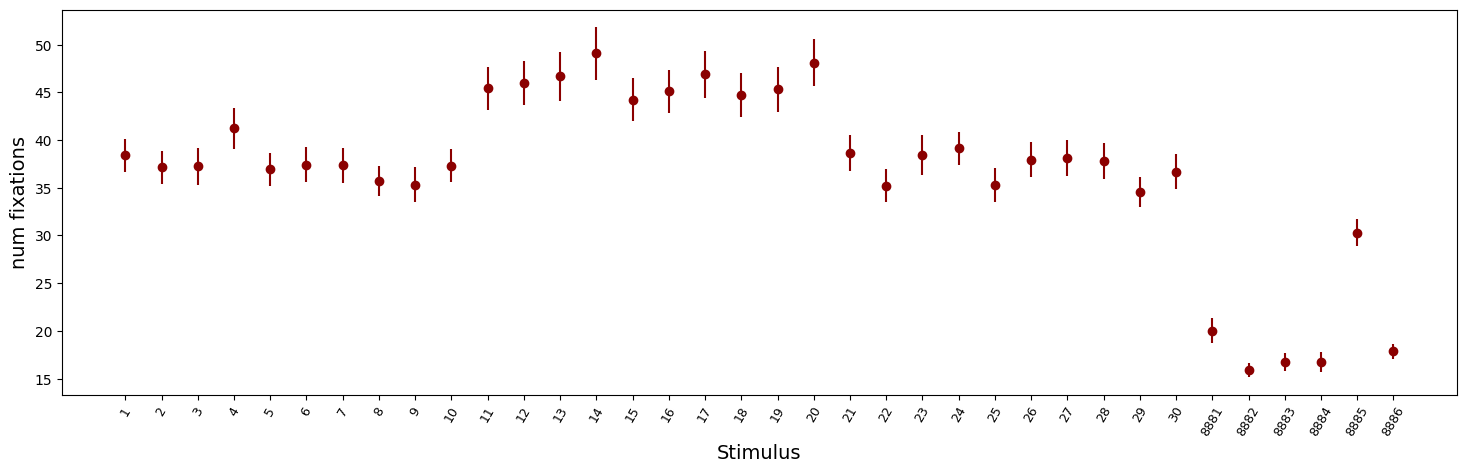

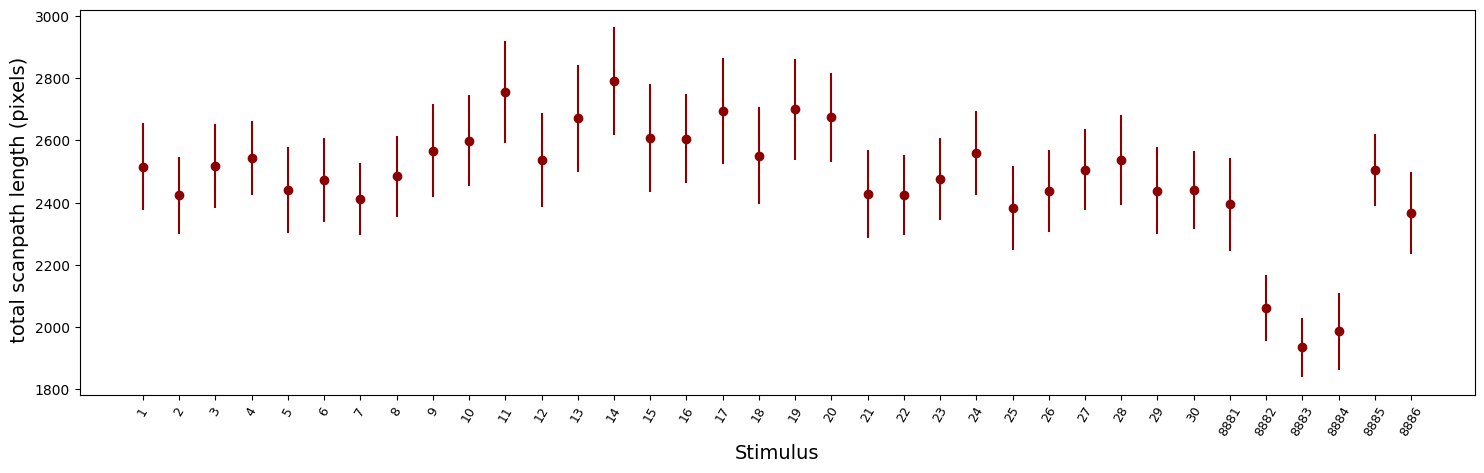

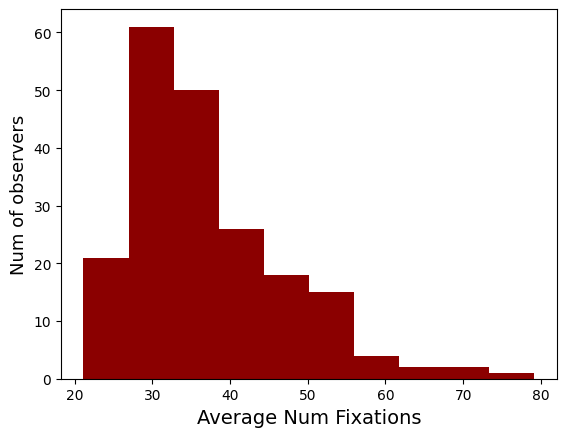

In [5]:

#sizeX,sizeY=1024, 768 
sizeX,sizeY=1920, 1080


DyslexiaDat=EyeData(FixData,sizeX,sizeY)
DyslexiaDat.DataInfo(mean_x='fix_x',mean_y='fix_y',FixDuration='duration_ms',Stimulus='stimulus',subjectID='subject')
DyslexiaDat.RunDescriptiveFix(Visual=1)

---

In [6]:
complete_data = []
missing_data = {}
subject_with_missing_data = {}
set_subj = set()
for i in range(0,36):
    FixGr=np.array(DyslexiaDat.nfix[0:117,i])
    if not np.isnan(FixGr).any():
        complete_data.append(i)
    if np.isnan(FixGr).any():
        missing_data[i] = np.isnan(FixGr).sum()
        for x in np.where(np.isnan(FixGr))[0]:
            subject_with_missing_data[x] = +1
            set_subj.add(x)


print(f'{len(complete_data)} Stimuli with complete data: {complete_data}')
print(f'{len(missing_data)} Stimuli with Missing data: {missing_data}')
print(f'Max subject that have not seen the stimulus: {max(missing_data.values())}')
print(f'{len(subject_with_missing_data)} Subjects with missing data: {subject_with_missing_data}')

10 Stimuli with complete data: [0, 3, 4, 5, 7, 15, 18, 28, 31, 32]
26 Stimuli with Missing data: {1: 1, 2: 1, 6: 1, 8: 1, 9: 1, 10: 3, 11: 3, 12: 2, 13: 3, 14: 1, 16: 2, 17: 1, 19: 2, 20: 1, 21: 1, 22: 1, 23: 1, 24: 2, 25: 1, 26: 2, 27: 1, 29: 1, 30: 1, 33: 1, 34: 2, 35: 3}
Max subject that have not seen the stimulus: 3
29 Subjects with missing data: {115: 1, 43: 1, 53: 1, 10: 1, 15: 1, 17: 1, 91: 1, 94: 1, 116: 1, 32: 1, 83: 1, 20: 1, 41: 1, 96: 1, 55: 1, 44: 1, 82: 1, 14: 1, 2: 1, 66: 1, 73: 1, 58: 1, 25: 1, 99: 1, 64: 1, 8: 1, 27: 1, 76: 1, 80: 1}


Here we check for the Munich subjects, the amount of stimuli and subject that have some empty data. In other words, we check for every subjects wich and how many stimuli they have not seen (or have been delete because with repetition > 0 and record_number > 0)

Over 36 stimuli 26 have at least one subject that have not seen them.

Over 117 subject only 20 have not seen at least one stimuli (actually every of these subjects have got a proble with one stimulus).

We can consider to remove this 20 subject from the dataset (that correspond to around 17% of the total), or consider to use only the 10 stimui that have full data for every subject, or every time that we randomly select a combination of stimulus/subject check if the subject has seen the stimulus and if not substitute it with another one.

---

In [7]:
WhichC, WhichCN = DyslexiaDat.GetGroups('Group')

Conditions [ 1.  2.  3.  4. nan]


In [8]:
WhichC = np.array(WhichC, dtype=float)
WhichC[np.isnan(WhichC)] = 4
WhichC = WhichC.astype(int)
WhichC[WhichC == 0] = 1
WhichC[WhichC == 2] = 0
WhichC[WhichC == 3] = 0
WhichC[WhichC == 4] = 0
WhichC

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0])

In [9]:
# convert WhichCN to a numpy array of type float
WhichCN = np.array(WhichCN, dtype=float)
# substitute nan values with max value + 1
WhichCN[np.isnan(WhichCN)] = 0 
WhichCN = WhichCN.astype(int)
# Trasform all 4 in 0
WhichCN[WhichCN == 4] = 0
WhichCN[WhichCN == 3] = 0
# Trasform all 1,2 in 1
WhichCN[WhichCN == 2] = 1
WhichCN

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0])

In [10]:
# create a list of subjects from 117 to 200
GrazSubs = DyslexiaDat.subjects[117:200]
GrazSubs_Idx = list(range(117,200))
MunichSubs_Idx = list(range(0,117))

## MLP

We define a multilayer perceptron (MLP) to train over specific features extracted from the data.

In [11]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

In [12]:
list(set_subj)

[2,
 8,
 10,
 14,
 15,
 17,
 20,
 25,
 27,
 32,
 41,
 43,
 44,
 53,
 55,
 58,
 64,
 66,
 73,
 76,
 80,
 82,
 83,
 91,
 94,
 96,
 99,
 115,
 116]

In [13]:
from scipy.stats import entropy
def get_entropy(self, subj, stim):
    # get fixation (array([x]), array([y]))
    fixations = DyslexiaDat.GetFixationData(DyslexiaDat.subjects[subj], DyslexiaDat.stimuli[stim])
    # calculate entropy of the fixation distribution
    sizeX = self.x_size
    sizeY = self.y_size
    x = fixations[0].tolist()
    y = fixations[1].tolist()
    # create a 2D histogram
    H, xedges, yedges = np.histogram2d(x, y, bins=(sizeX, sizeY))
    # normalize the histogram
    H = H / H.sum()
    # calculate entropy
    ent = entropy(H.flatten())
    return ent

In [14]:
def GlobalFeature(self, Saccades, stim):
    Features = np.empty((self.ns), dtype=object)
    for s in range(self.ns):
        angles = []
        progressive_s = 0
        regressive_s = 0
        for saccade in Saccades[s][stim]:
            angles.append(saccade.Angle())
            if saccade.Angle() > 270 or saccade.Angle() < 90:
                progressive_s += 1
            elif saccade.Angle() > 90 and saccade.Angle() < 270:
                regressive_s += 1
        
        fix_durations = DyslexiaDat.GetDurations(DyslexiaDat.subjects[s], DyslexiaDat.stimuli[stim])

        Features[s] = {'number_fixation':  self.nfixations[s][stim],
                       'fixation_entropy': get_entropy(self, s, stim),
                       'mean_fixation_duration': np.mean(fix_durations),
                       'std_fixation_duration': np.std(fix_durations),
                       'total_reading_duration': np.sum(fix_durations),
                       'mean_saccade_amplitude': np.mean(angles),
                       'std_saccade_amplitude': np.std(angles),
                       'regression': regressive_s,
                       'progression/regression': regressive_s if regressive_s == 0 else progressive_s/regressive_s
                        }
    return Features

In [15]:
stimuli = list(range(0, 30))

In [16]:
GlobalFeature_array = []
Saccades = DyslexiaDat.GetSaccades()
for stim in stimuli:
    GlobalFeature_array.append(GlobalFeature(DyslexiaDat, Saccades, stim))
    print(f'Global features for stimulus {stim+1} calculated')

C:\Users\Utente\AppData\Local\Temp\ipykernel_63852\641606591.py:13: RuntimeWarning: invalid value encountered in divide
  H = H / H.sum()
c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered i

Global features for stimulus 1 calculated
Global features for stimulus 2 calculated
Global features for stimulus 3 calculated
Global features for stimulus 4 calculated
Global features for stimulus 5 calculated
Global features for stimulus 6 calculated
Global features for stimulus 7 calculated
Global features for stimulus 8 calculated
Global features for stimulus 9 calculated
Global features for stimulus 10 calculated
Global features for stimulus 11 calculated
Global features for stimulus 12 calculated
Global features for stimulus 13 calculated
Global features for stimulus 14 calculated
Global features for stimulus 15 calculated
Global features for stimulus 16 calculated
Global features for stimulus 17 calculated
Global features for stimulus 18 calculated
Global features for stimulus 19 calculated
Global features for stimulus 20 calculated
Global features for stimulus 21 calculated
Global features for stimulus 22 calculated
Global features for stimulus 23 calculated
Global features for 

In [17]:
SaccadeObj = DyslexiaDat.GetSaccades()

In [18]:
Saccade = DyslexiaDat.SaccadeSel(SaccadeObj, nHor=1, nVer=1)

In [19]:
Saccade.shape

(200, 36, 1, 1)

In [20]:
SimMatrix = DyslexiaDat.SacSim1Group(Saccade, method='cosine', Thr=5)

In [21]:
SimMatrix.shape

(200, 200, 36, 1, 1)

In [22]:
from PyEyeSim.scanpathsimhelper import CreatAoiRects

AOIRects = CreatAoiRects(1, 1, DyslexiaDat.x_size, DyslexiaDat.y_size, allsame=DyslexiaDat.np)

In [23]:
Features = np.empty((DyslexiaDat.ns, len(stimuli),  1, 1), dtype=object)
for stim in stimuli:
    Features[:,stim,:,:] = DyslexiaDat.FeatureExtraction(SaccadeObj, Saccade[:,stim,:,:], nHor=1, stim=stim, nVer=1, AOIRects=AOIRects)
    print(f'Features for stimulus {stim+1} calculated')

C:\Users\Utente\Documents\University\Master\PyEyeSim\PyEyeSim\_scanpathsim.py:727: RuntimeWarning: Mean of empty slice
  'mean_fixation_duration': np.nanmean(duration),


Features for stimulus 1 calculated
Features for stimulus 2 calculated
Features for stimulus 3 calculated
Features for stimulus 4 calculated
Features for stimulus 5 calculated
Features for stimulus 6 calculated
Features for stimulus 7 calculated
Features for stimulus 8 calculated
Features for stimulus 9 calculated
Features for stimulus 10 calculated
Features for stimulus 11 calculated
Features for stimulus 12 calculated
Features for stimulus 13 calculated
Features for stimulus 14 calculated
Features for stimulus 15 calculated
Features for stimulus 16 calculated
Features for stimulus 17 calculated
Features for stimulus 18 calculated
Features for stimulus 19 calculated
Features for stimulus 20 calculated
Features for stimulus 21 calculated
Features for stimulus 22 calculated
Features for stimulus 23 calculated
Features for stimulus 24 calculated
Features for stimulus 25 calculated
Features for stimulus 26 calculated
Features for stimulus 27 calculated
Features for stimulus 28 calculated
F

In [24]:
Features.shape

(200, 30, 1, 1)

In [25]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
#  Calculate training and test data for different folds
train_subjects = []
test_subjects = []
training_Vals = []
labels_train = []
test_Vals = []
labels_test = []

subj = list(set(MunichSubs_Idx) - set_subj)

labels = np.array([WhichCN[sub] for sub in subj])

for i in range(100):
    train_subj, test_subj = train_test_split(
        subj, 
        test_size=0.1, 
        random_state=i,
        stratify=labels
    )

    train_subjects.append(train_subj)
    test_subjects.append(test_subj)

    remove_subj = np.append(test_subj, np.array(GrazSubs_Idx))

    # Train set
    temp = []
    for stim in stimuli:
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(train_subj), nHor=1, nVer=1, inferS=False, method='cosine', Thr=5, nosubj=list(remove_subj), SaccadeObj=SaccadeObj, Saccades=Saccade[:,stim,:,:], Features=Features[:,stim,:,:], SimMatrix=SimMatrix[:,:, stim, :,:])
        temp.append(SimAndFeatureVals)
    
    training_Vals.append(temp)
    labels_train.append(np.array([WhichCN[sub] for sub in train_subj]))


    # Test set
    temp = []
    for stim in stimuli:
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(test_subj), nHor=1, nVer=1, inferS=False, method='cosine', Thr=5, nosubj=list(GrazSubs_Idx), SaccadeObj=SaccadeObj, Saccades=Saccade[:,stim,:,:], Features=Features[:,stim,:,:], SimMatrix=SimMatrix[:,:, stim, :,:]) 
        temp.append(SimAndFeatureVals)
    
    test_Vals.append(temp)
    labels_test.append(np.array([WhichCN[sub] for sub in test_subj]))

In [26]:
print(len(training_Vals)) # 5 folds
print(len(training_Vals[0])) # 30 stimuli
print(len(training_Vals[0][0])) # 79 train subjects so 79 values for each group
print(len(test_Vals[0][0])) # 9 test subjects

100
30
79
9


In [27]:
training_Vals[0][5][9][0][0][4] # mean saccade similarity group 0 subject with index 10 in the training list for stimulus 5 of the first fold

0.22108851657371734

---

In [28]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from captum.attr import IntegratedGradients

def explain_prediction(model, input_tensor, target_class=None):
    model.eval()
    
    # Ensure input has batch dimension
    if len(input_tensor.shape) == 1:
        input_tensor = input_tensor.unsqueeze(0)
    
    # Ensure input requires grad
    input_tensor = input_tensor.requires_grad_(True)
    
    ig = IntegratedGradients(model)
    
    # If target_class is None, use the predicted class
    if target_class is None:
        with torch.no_grad():
            pred = model(input_tensor)
            target_class = pred.argmax(dim=1)
    else:
        # Ensure target_class is proper tensor format
        if isinstance(target_class, (int, np.integer)):
            target_class = torch.tensor([target_class])
        elif isinstance(target_class, np.ndarray):
            target_class = torch.from_numpy(target_class)
    
    # Get attributions
    attributions, approximation_error = ig.attribute(
        input_tensor, 
        target=target_class, 
        return_convergence_delta=True
    )
    return attributions, approximation_error

def visualize_attribution_boxplot(attribution_matrix, feature_names):
    """
    Create a box plot showing the distribution of attributions across stimuli
    
    Args:
        attribution_matrix: Shape (n_features, n_stimuli) - attributions for each feature across stimuli
        feature_names: List of feature names
    """
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Create box plot
    box_data = [attribution_matrix[i, :] for i in range(len(feature_names))]
    bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True, 
                    showmeans=True, meanline=True)
    
    # Color boxes based on mean attribution (red for negative, blue for positive)
    means = [np.mean(data) for data in box_data]
    for patch, mean_val in zip(bp['boxes'], means):
        if mean_val < 0:
            patch.set_facecolor('lightcoral')
        else:
            patch.set_facecolor('lightblue')
    
    # Customize the plot
    ax.set_ylabel("Attribution Score")
    ax.set_title("Feature Attribution Distribution Across Stimuli\n(Box=IQR, Whiskers=1.5×IQR, Orange=Mean, Green-Dotted=Median, White-Circle=Outliers)")
    ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)  # Add zero line
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nFeature Attribution Summary:")
    print("-" * 60)
    for i, name in enumerate(feature_names):
        data = attribution_matrix[i, :]
        print(f"{name:30s}: Mean={np.mean(data):7.4f}, Std={np.std(data):7.4f}, "
              f"Min={np.min(data):7.4f}, Max={np.max(data):7.4f}")

def visualize_attribution_comparison(attribution_matrix, feature_names):
    """
    Create both bar plot (means) and box plot side by side
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Left plot: Traditional bar plot with error bars
    means = np.mean(attribution_matrix, axis=1)
    stds = np.std(attribution_matrix, axis=1)
    colors = ['red' if x < 0 else 'blue' for x in means]
    
    ax1.barh(feature_names, means, xerr=stds, color=colors, alpha=0.7, capsize=5)
    ax1.set_xlabel("Attribution Score")
    ax1.set_title("Mean Attribution ± Std Dev")
    ax1.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    # Right plot: Box plot
    box_data = [attribution_matrix[i, :] for i in range(len(feature_names))]
    bp = ax2.boxplot(box_data, labels=range(len(feature_names)), patch_artist=True,
                     showmeans=True, meanline=True, vert=False)
    
    # Color boxes
    for patch, mean_val in zip(bp['boxes'], means):
        if mean_val < 0:
            patch.set_facecolor('lightcoral')
        else:
            patch.set_facecolor('lightblue')
    
    ax2.set_yticks(range(1, len(feature_names) + 1))
    ax2.set_yticklabels(feature_names)
    ax2.set_xlabel("Attribution Score")
    ax2.set_title("Attribution Distribution (Box Plot)")
    ax2.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [29]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 11))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        
    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [30]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
    def forward(self, x): 
        return x

In [31]:
def train_test_pipeline(stimuli, momentum = 0.8):
    torch.manual_seed(42)
    np.random.seed(42)
    results = []
    accuracy = []
    conf_matrix = np.zeros((2, 2))

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    for i in range(100):
        best_loss = np.inf

        vector_roi = np.array([])
        for idx, _ in enumerate(stimuli):
            vector_roi = vectorize(training_Vals[i][idx], subj=train_subjects[i], stim=idx, vec=vector_roi)
            
        # apply standardization
        scaler = StandardScaler()
        vector_roi = scaler.fit_transform(vector_roi)

        # Train set
        X_train = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_train = torch.tensor(labels_train[i], dtype=torch.long).to(device) 

        vector_roi = np.array([])
        for idx, _ in enumerate(stimuli):
            vector_roi = vectorize(test_Vals[i][idx], subj=test_subjects[i], stim=idx, vec=vector_roi)
        
        # apply standardization
        scaler = StandardScaler()
        vector_roi = scaler.fit_transform(vector_roi)
        # Test set
        X_test = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_test = torch.tensor(labels_test[i], dtype=torch.long).to(device) 

        # Initialize the model, loss function, and optimizer
        model = NN().to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=0.2, momentum=momentum)

        # Train the model
        model.train()
        for epoch in range(20):  # number of epochs
            optimizer.zero_grad()
            outputs = model(X_train)
            loss = criterion(outputs, y_train)
            loss.backward()
            optimizer.step()
            # print loss every 5 epochs
            if epoch % 5 == 0:
                print(f'Epoch {epoch} loss: {loss.item()}')

            if loss < best_loss:
                # save checkpoint
                checkpoint = {'model': model, 'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict()}
                best_loss = loss

        # Load the best model
        model.load_state_dict(checkpoint['state_dict'])
        model.eval()
        with torch.no_grad():
            outputs = model(X_test)
            predictions = torch.argmax(outputs, dim=1)  # Take the class with highest probability
            accuracy.append(accuracy_score(y_test.cpu(), predictions.cpu()))
            conf_matrix += confusion_matrix(y_test.cpu(), predictions.cpu())
        # Save data
        results.append({
            'model': model,
            'X_train': X_train,
            'y_train': y_train,
            'X_test': X_test,
            'y_test': y_test,
            'predictions': predictions.cpu().numpy(),
            'accuracy': accuracy[-1],
            'conf_matrix': conf_matrix
        })

    # Results
    accuracy = np.array(accuracy)
    print(f'Average accuracy: {np.mean(accuracy)}')
    print(f'Standard deviation: {np.std(accuracy)}')
    print(f'Total confusion matrix:\n{conf_matrix}')
    print(f'False positives: {conf_matrix[0, 1]}')
    print(f'False negatives: {conf_matrix[1, 0]}')

    return results

In [66]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 4))
    for s, subj_id in enumerate(subj):
        vector_roi[s][0] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][1] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1
        vector_roi[s][2] = SimAndFeatureVals[s][0][0][6] # std saccade similarity group 0
        vector_roi[s][3] = SimAndFeatureVals[s][0][0][7] # std saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [67]:
import re


torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(120, 60)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(60, 30)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(30, 15) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(15, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.740566611289978
Epoch 5 loss: 0.606797456741333
Epoch 10 loss: 0.47934606671333313
Epoch 15 loss: 0.3752899169921875
Epoch 0 loss: 0.70118647813797
Epoch 5 loss: 0.5054939389228821
Epoch 10 loss: 0.4169425368309021
Epoch 15 loss: 0.36362800002098083
Epoch 0 loss: 0.7227715849876404
Epoch 5 loss: 0.5826109647750854
Epoch 10 loss: 0.4576873779296875
Epoch 15 loss: 0.4157085120677948
Epoch 0 loss: 0.7283089756965637
Epoch 5 loss: 0.6067439913749695
Epoch 10 loss: 0.4850252866744995
Epoch 15 loss: 0.43511393666267395
Epoch 0 loss: 0.7449992895126343
Epoch 5 loss: 0.617112934589386
Epoch 10 loss: 0.49642398953437805
Epoch 15 loss: 0.41060614585876465
Epoch 0 loss: 0.700617790222168
Epoch 5 loss: 0.547052264213562
Epoch 10 loss: 0.4588238596916199
Epoch 15 loss: 0.4298967719078064
Epoch 0 loss: 0.6866453886032104
Epoch 5 loss: 0.5492165684700012
Epoch 10 loss: 0.4603998064994812
Epoch 15 loss: 0.3639872670173645
Epoch 0 loss: 0.788765549659729
Epoch 5 loss:

#### Original

In [32]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 7))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['mean_fixation_duration']
        vector_roi[s][3] = Features['total_reading_duration']
        vector_roi[s][4] = Features['regression']
        vector_roi[s][5] = Features['progression/regression']
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
    
    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [33]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(210, 110)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(110, 55)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(55, 27) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(27, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7131434679031372
Epoch 5 loss: 0.4606546461582184
Epoch 10 loss: 0.36916568875312805
Epoch 15 loss: 0.3256061375141144
Epoch 0 loss: 0.730433464050293
Epoch 5 loss: 0.4113810956478119
Epoch 10 loss: 0.36096668243408203
Epoch 15 loss: 0.3252410888671875
Epoch 0 loss: 0.7201611399650574
Epoch 5 loss: 0.4079156816005707
Epoch 10 loss: 0.3424937427043915
Epoch 15 loss: 0.31567686796188354
Epoch 0 loss: 0.7518149614334106
Epoch 5 loss: 0.4379742741584778
Epoch 10 loss: 0.3533564805984497
Epoch 15 loss: 0.3426832854747772
Epoch 0 loss: 0.7302141189575195
Epoch 5 loss: 0.3983314037322998
Epoch 10 loss: 0.35612744092941284
Epoch 15 loss: 0.3278665542602539
Epoch 0 loss: 0.7457640171051025
Epoch 5 loss: 0.4502178132534027
Epoch 10 loss: 0.3677101731300354
Epoch 15 loss: 0.33771809935569763
Epoch 0 loss: 0.7137212753295898
Epoch 5 loss: 0.41651222109794617
Epoch 10 loss: 0.34449711441993713
Epoch 15 loss: 0.3232409954071045
Epoch 0 loss: 0.6997364163398743
Epoc

In [34]:
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7131434679031372
Epoch 5 loss: 0.49717408418655396
Epoch 10 loss: 0.40481486916542053
Epoch 15 loss: 0.33966389298439026
Epoch 0 loss: 0.730433464050293
Epoch 5 loss: 0.427478551864624
Epoch 10 loss: 0.38164523243904114
Epoch 15 loss: 0.3503635823726654
Epoch 0 loss: 0.7201611399650574
Epoch 5 loss: 0.4332576096057892
Epoch 10 loss: 0.3829038739204407
Epoch 15 loss: 0.33269158005714417
Epoch 0 loss: 0.7518149614334106
Epoch 5 loss: 0.44047972559928894
Epoch 10 loss: 0.3796793818473816
Epoch 15 loss: 0.3539484739303589
Epoch 0 loss: 0.7302141189575195
Epoch 5 loss: 0.422753244638443
Epoch 10 loss: 0.4134810268878937
Epoch 15 loss: 0.350059449672699
Epoch 0 loss: 0.7457640171051025
Epoch 5 loss: 0.48240363597869873
Epoch 10 loss: 0.3966444432735443
Epoch 15 loss: 0.36374202370643616
Epoch 0 loss: 0.7137212753295898
Epoch 5 loss: 0.44036608934402466
Epoch 10 loss: 0.36239707469940186
Epoch 15 loss: 0.3515934646129608
Epoch 0 loss: 0.6997364163398743
Epoc

Approximation Error: -6.095888602430932e-05 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_63852\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


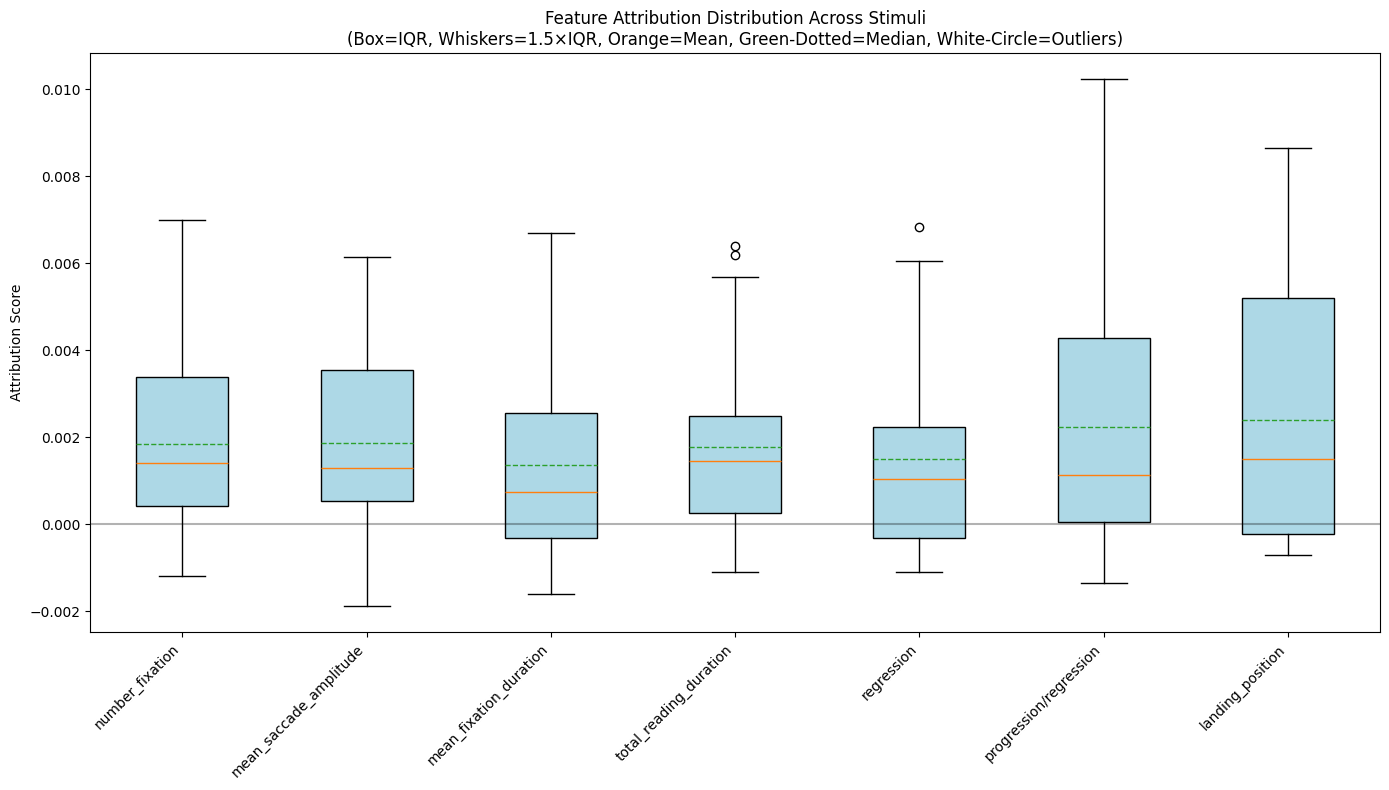


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0019, Std= 0.0022, Min=-0.0012, Max= 0.0070
mean_saccade_amplitude        : Mean= 0.0019, Std= 0.0022, Min=-0.0019, Max= 0.0061
mean_fixation_duration        : Mean= 0.0014, Std= 0.0022, Min=-0.0016, Max= 0.0067
total_reading_duration        : Mean= 0.0018, Std= 0.0022, Min=-0.0011, Max= 0.0064
regression                    : Mean= 0.0015, Std= 0.0022, Min=-0.0011, Max= 0.0068
progression/regression        : Mean= 0.0022, Std= 0.0029, Min=-0.0013, Max= 0.0102
landing_position              : Mean= 0.0024, Std= 0.0029, Min=-0.0007, Max= 0.0087


In [35]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original (without mean saccade amplitude)

In [36]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 6))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_fixation_duration']
        vector_roi[s][2] = Features['total_reading_duration']
        vector_roi[s][3] = Features['regression']
        vector_roi[s][4] = Features['progression/regression']
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][3]

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [37]:
# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(180, 140)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(140, 70)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(70, 35) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(35, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.793735682964325
Epoch 5 loss: 0.4235852360725403
Epoch 10 loss: 0.3582973778247833
Epoch 15 loss: 0.34061601758003235
Epoch 0 loss: 0.7556096315383911
Epoch 5 loss: 0.41910675168037415
Epoch 10 loss: 0.3504469096660614
Epoch 15 loss: 0.3414306044578552
Epoch 0 loss: 0.7275567650794983
Epoch 5 loss: 0.4294252097606659
Epoch 10 loss: 0.34181514382362366
Epoch 15 loss: 0.3303203582763672
Epoch 0 loss: 0.7205352783203125
Epoch 5 loss: 0.4365013837814331
Epoch 10 loss: 0.34117501974105835
Epoch 15 loss: 0.3179859220981598
Epoch 0 loss: 0.6658161878585815
Epoch 5 loss: 0.3858913779258728
Epoch 10 loss: 0.33066579699516296
Epoch 15 loss: 0.3177465498447418
Epoch 0 loss: 0.7471939325332642
Epoch 5 loss: 0.40952542424201965
Epoch 10 loss: 0.33122506737709045
Epoch 15 loss: 0.32014504075050354
Epoch 0 loss: 0.6643737554550171
Epoch 5 loss: 0.39821118116378784
Epoch 10 loss: 0.35361728072166443
Epoch 15 loss: 0.3375599682331085
Epoch 0 loss: 0.7522683143615723
E

In [38]:
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.793735682964325
Epoch 5 loss: 0.451153963804245
Epoch 10 loss: 0.3841632604598999
Epoch 15 loss: 0.3563920855522156
Epoch 0 loss: 0.7556096315383911
Epoch 5 loss: 0.43696391582489014
Epoch 10 loss: 0.38296160101890564
Epoch 15 loss: 0.36523178219795227
Epoch 0 loss: 0.7275567650794983
Epoch 5 loss: 0.4668218791484833
Epoch 10 loss: 0.3765139877796173
Epoch 15 loss: 0.34992706775665283
Epoch 0 loss: 0.7205352783203125
Epoch 5 loss: 0.47367599606513977
Epoch 10 loss: 0.3760978877544403
Epoch 15 loss: 0.35425835847854614
Epoch 0 loss: 0.6658161878585815
Epoch 5 loss: 0.411102294921875
Epoch 10 loss: 0.3582495152950287
Epoch 15 loss: 0.3286852240562439
Epoch 0 loss: 0.7471939325332642
Epoch 5 loss: 0.4421406388282776
Epoch 10 loss: 0.36698010563850403
Epoch 15 loss: 0.3519931733608246
Epoch 0 loss: 0.6643737554550171
Epoch 5 loss: 0.4259291887283325
Epoch 10 loss: 0.3781847357749939
Epoch 15 loss: 0.35431787371635437
Epoch 0 loss: 0.7522683143615723
Epoch

Approximation Error: 4.2860010580625385e-05 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_63852\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


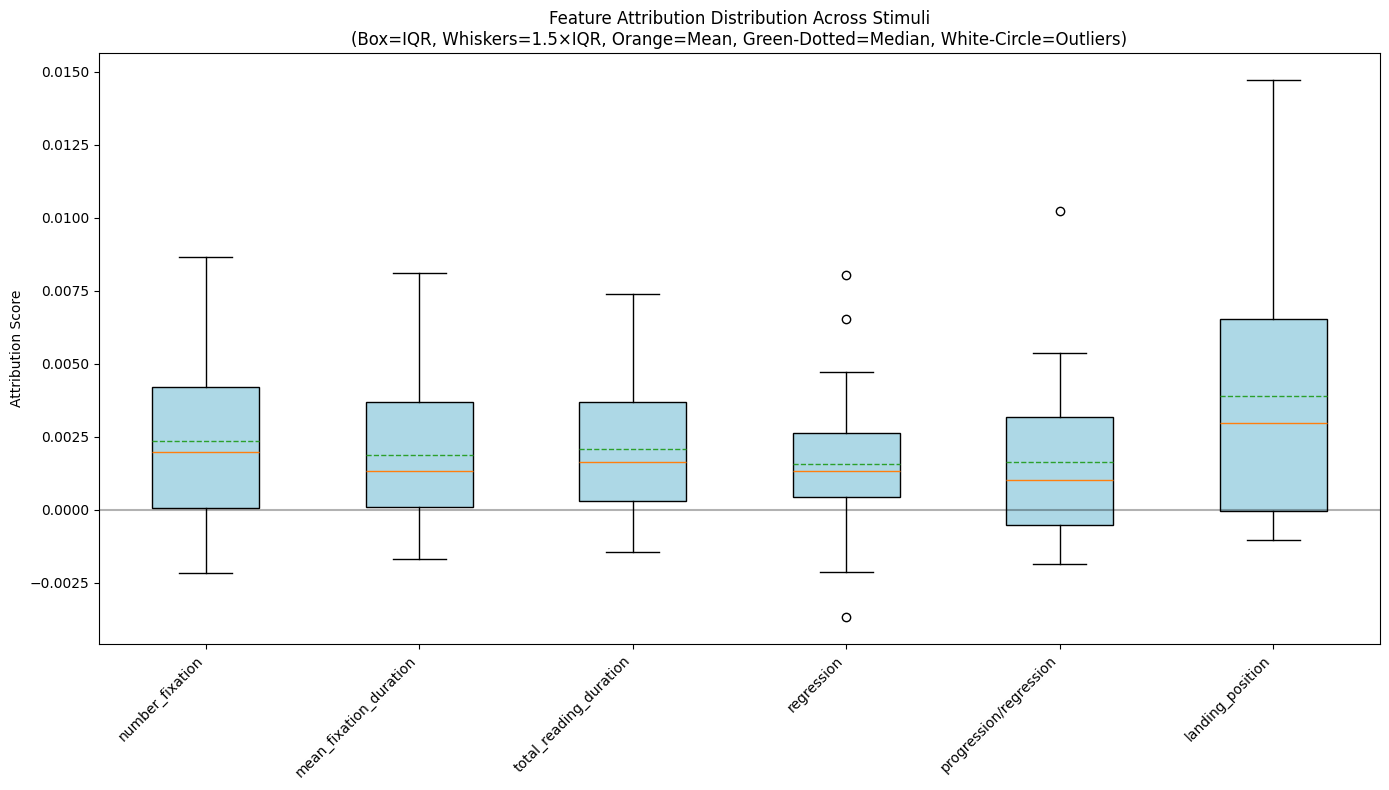


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0024, Std= 0.0027, Min=-0.0022, Max= 0.0087
mean_fixation_duration        : Mean= 0.0019, Std= 0.0025, Min=-0.0017, Max= 0.0081
total_reading_duration        : Mean= 0.0021, Std= 0.0024, Min=-0.0014, Max= 0.0074
regression                    : Mean= 0.0016, Std= 0.0024, Min=-0.0037, Max= 0.0080
progression/regression        : Mean= 0.0016, Std= 0.0027, Min=-0.0018, Max= 0.0102
landing_position              : Mean= 0.0039, Std= 0.0043, Min=-0.0010, Max= 0.0147


In [39]:
feature_names = [
    "number_fixation",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original + Additional Features

In [40]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 10))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['std_saccade_amplitude']
        vector_roi[s][3] = Features['mean_fixation_duration']
        vector_roi[s][4] = Features['std_fixation_duration']
        vector_roi[s][5] = Features['total_reading_duration']
        vector_roi[s][6] = Features['regression']
        vector_roi[s][7] = Features['progression/regression']
        vector_roi[s][8] = Features['fixation_entropy']
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
    
    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [41]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(300, 150)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(150, 75)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(75, 33) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(33, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.8288525938987732
Epoch 5 loss: 0.4238378703594208
Epoch 10 loss: 0.343171626329422
Epoch 15 loss: 0.3216562867164612
Epoch 0 loss: 0.7833547592163086
Epoch 5 loss: 0.4160570502281189
Epoch 10 loss: 0.350898802280426
Epoch 15 loss: 0.3302916884422302
Epoch 0 loss: 0.7440958619117737
Epoch 5 loss: 0.3954187333583832
Epoch 10 loss: 0.32414963841438293
Epoch 15 loss: 0.3146640360355377
Epoch 0 loss: 0.6457067131996155
Epoch 5 loss: 0.35831886529922485
Epoch 10 loss: 0.33468863368034363
Epoch 15 loss: 0.31992867588996887
Epoch 0 loss: 0.6939080357551575
Epoch 5 loss: 0.40561965107917786
Epoch 10 loss: 0.3452448844909668
Epoch 15 loss: 0.3219095468521118
Epoch 0 loss: 0.687343955039978
Epoch 5 loss: 0.39541012048721313
Epoch 10 loss: 0.3360675275325775
Epoch 15 loss: 0.3231557309627533
Epoch 0 loss: 0.7194271683692932
Epoch 5 loss: 0.39451682567596436
Epoch 10 loss: 0.3369085490703583
Epoch 15 loss: 0.31918764114379883
Epoch 0 loss: 0.6778672933578491
Epoch

In [42]:
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.8288525938987732
Epoch 5 loss: 0.4396642744541168
Epoch 10 loss: 0.36479806900024414
Epoch 15 loss: 0.332672119140625
Epoch 0 loss: 0.7833547592163086
Epoch 5 loss: 0.43822962045669556
Epoch 10 loss: 0.3780927062034607
Epoch 15 loss: 0.34418201446533203
Epoch 0 loss: 0.7440958619117737
Epoch 5 loss: 0.4177600145339966
Epoch 10 loss: 0.3478493094444275
Epoch 15 loss: 0.329466849565506
Epoch 0 loss: 0.6457067131996155
Epoch 5 loss: 0.38897421956062317
Epoch 10 loss: 0.36057719588279724
Epoch 15 loss: 0.32999691367149353
Epoch 0 loss: 0.6939080357551575
Epoch 5 loss: 0.41323229670524597
Epoch 10 loss: 0.3557163178920746
Epoch 15 loss: 0.3381439745426178
Epoch 0 loss: 0.687343955039978
Epoch 5 loss: 0.4042739272117615
Epoch 10 loss: 0.3486306667327881
Epoch 15 loss: 0.3488728106021881
Epoch 0 loss: 0.7194271683692932
Epoch 5 loss: 0.4178132712841034
Epoch 10 loss: 0.36279773712158203
Epoch 15 loss: 0.34564584493637085
Epoch 0 loss: 0.6778672933578491
Epoc

Approximation Error: 1.0336256309528835e-05 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_63852\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


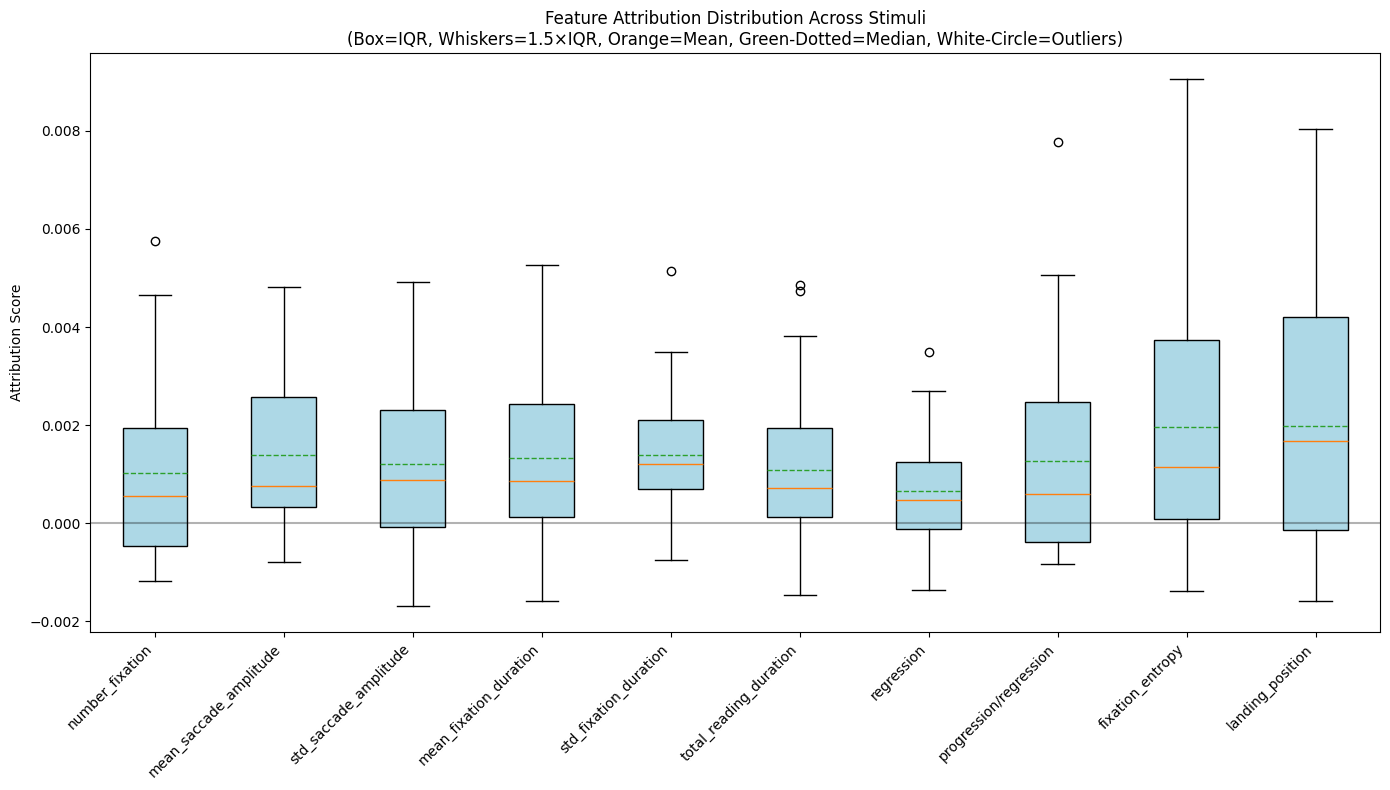


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0010, Std= 0.0018, Min=-0.0012, Max= 0.0058
mean_saccade_amplitude        : Mean= 0.0014, Std= 0.0016, Min=-0.0008, Max= 0.0048
std_saccade_amplitude         : Mean= 0.0012, Std= 0.0017, Min=-0.0017, Max= 0.0049
mean_fixation_duration        : Mean= 0.0013, Std= 0.0017, Min=-0.0016, Max= 0.0053
std_fixation_duration         : Mean= 0.0014, Std= 0.0014, Min=-0.0008, Max= 0.0051
total_reading_duration        : Mean= 0.0011, Std= 0.0016, Min=-0.0015, Max= 0.0049
regression                    : Mean= 0.0007, Std= 0.0012, Min=-0.0013, Max= 0.0035
progression/regression        : Mean= 0.0013, Std= 0.0020, Min=-0.0008, Max= 0.0078
fixation_entropy              : Mean= 0.0020, Std= 0.0027, Min=-0.0014, Max= 0.0090
landing_position              : Mean= 0.0020, Std= 0.0024, Min=-0.0016, Max= 0.0080


In [43]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "std_saccade_amplitude",
    "mean_fixation_duration",
    "std_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "fixation_entropy",
    "landing_position"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original and Similarity features (Avg + Std)

In [44]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 11))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['mean_fixation_duration']
        vector_roi[s][3] = Features['total_reading_duration']
        vector_roi[s][4] = Features['regression']
        vector_roi[s][5] = Features['progression/regression']
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][8] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][6] # std saccade similarity group 0
        vector_roi[s][10] = SimAndFeatureVals[s][0][0][7] # std saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [45]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(330, 165)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(165, 83)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(83, 42) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(42, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x

In [46]:
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7405446767807007
Epoch 5 loss: 0.37593555450439453
Epoch 10 loss: 0.31944647431373596
Epoch 15 loss: 0.31688228249549866
Epoch 0 loss: 0.7076063752174377
Epoch 5 loss: 0.3935689330101013
Epoch 10 loss: 0.33209335803985596
Epoch 15 loss: 0.31569305062294006
Epoch 0 loss: 0.6956570148468018
Epoch 5 loss: 0.3889491856098175
Epoch 10 loss: 0.33257660269737244
Epoch 15 loss: 0.31501901149749756
Epoch 0 loss: 0.7474275231361389
Epoch 5 loss: 0.39900490641593933
Epoch 10 loss: 0.329932302236557
Epoch 15 loss: 0.31580406427383423
Epoch 0 loss: 0.7020052671432495
Epoch 5 loss: 0.3926650285720825
Epoch 10 loss: 0.35322898626327515
Epoch 15 loss: 0.31531888246536255
Epoch 0 loss: 0.7198445796966553
Epoch 5 loss: 0.40827450156211853
Epoch 10 loss: 0.34037646651268005
Epoch 15 loss: 0.32194364070892334
Epoch 0 loss: 0.7527615427970886
Epoch 5 loss: 0.38066017627716064
Epoch 10 loss: 0.3198205828666687
Epoch 15 loss: 0.3156319260597229
Epoch 0 loss: 0.7409211993217

In [47]:
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7405446767807007
Epoch 5 loss: 0.38895994424819946
Epoch 10 loss: 0.34304580092430115
Epoch 15 loss: 0.32871633768081665
Epoch 0 loss: 0.7076063752174377
Epoch 5 loss: 0.41805484890937805
Epoch 10 loss: 0.34647640585899353
Epoch 15 loss: 0.33720341324806213
Epoch 0 loss: 0.6956570148468018
Epoch 5 loss: 0.40893206000328064
Epoch 10 loss: 0.3506701588630676
Epoch 15 loss: 0.3243274390697479
Epoch 0 loss: 0.7474275231361389
Epoch 5 loss: 0.4348115622997284
Epoch 10 loss: 0.35192060470581055
Epoch 15 loss: 0.33419379591941833
Epoch 0 loss: 0.7020052671432495
Epoch 5 loss: 0.42442330718040466
Epoch 10 loss: 0.38522985577583313
Epoch 15 loss: 0.32523873448371887
Epoch 0 loss: 0.7198445796966553
Epoch 5 loss: 0.4456183612346649
Epoch 10 loss: 0.36408287286758423
Epoch 15 loss: 0.33558446168899536
Epoch 0 loss: 0.7527615427970886
Epoch 5 loss: 0.4087974429130554
Epoch 10 loss: 0.34028440713882446
Epoch 15 loss: 0.3297463655471802
Epoch 0 loss: 0.740921199321

Approximation Error: 8.638750296086073e-05 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_63852\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


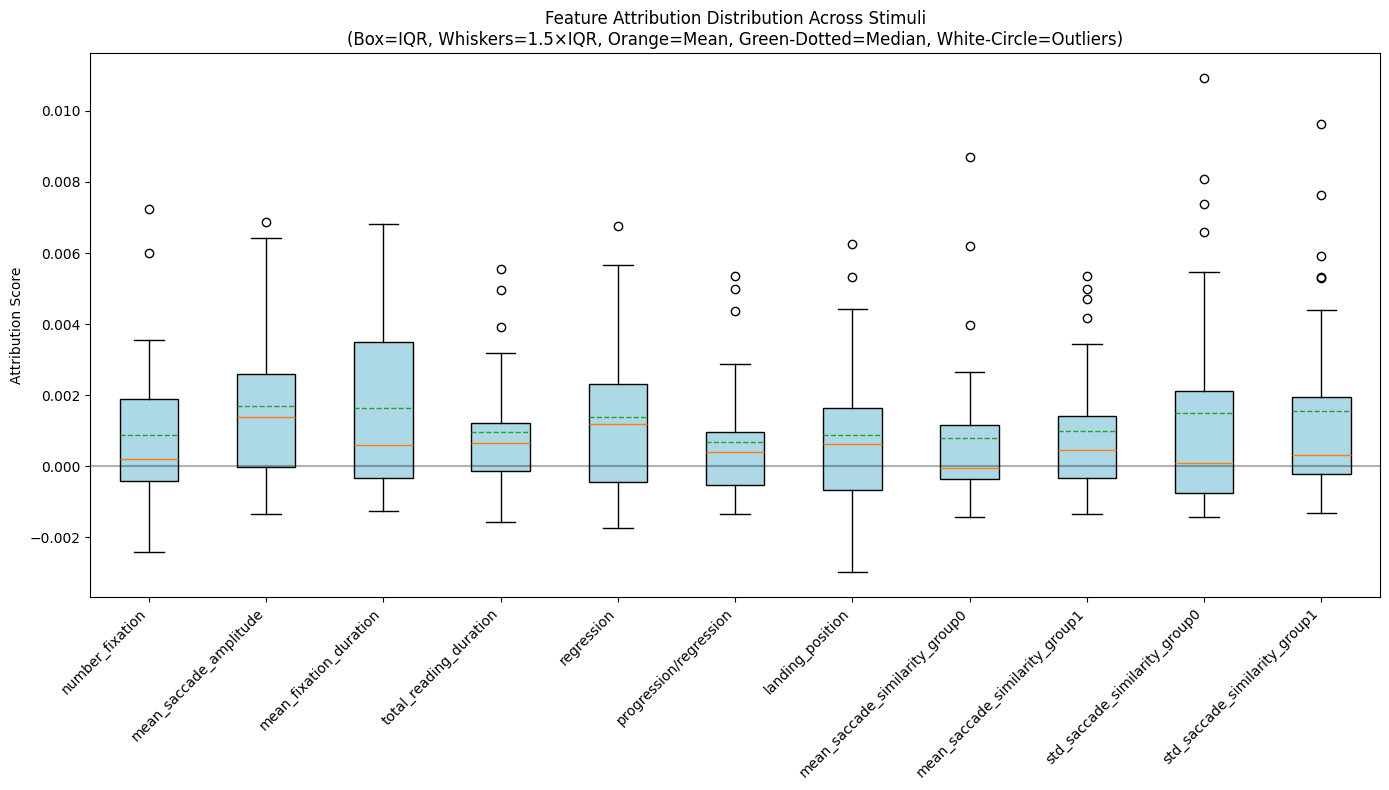


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0009, Std= 0.0021, Min=-0.0024, Max= 0.0073
mean_saccade_amplitude        : Mean= 0.0017, Std= 0.0022, Min=-0.0013, Max= 0.0069
mean_fixation_duration        : Mean= 0.0016, Std= 0.0024, Min=-0.0013, Max= 0.0068
total_reading_duration        : Mean= 0.0009, Std= 0.0017, Min=-0.0016, Max= 0.0056
regression                    : Mean= 0.0014, Std= 0.0021, Min=-0.0017, Max= 0.0068
progression/regression        : Mean= 0.0007, Std= 0.0017, Min=-0.0013, Max= 0.0054
landing_position              : Mean= 0.0009, Std= 0.0021, Min=-0.0030, Max= 0.0062
mean_saccade_similarity_group0: Mean= 0.0008, Std= 0.0021, Min=-0.0014, Max= 0.0087
mean_saccade_similarity_group1: Mean= 0.0010, Std= 0.0019, Min=-0.0013, Max= 0.0054
std_saccade_similarity_group0 : Mean= 0.0015, Std= 0.0032, Min=-0.0014, Max= 0.0109
std_saccade_similarity_group1 : Mean= 0.0016, Std= 0.0028, Min=-0.001

In [48]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original and Avg Similarity

In [49]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 9))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['mean_fixation_duration']
        vector_roi[s][3] = Features['total_reading_duration']
        vector_roi[s][4] = Features['regression']
        vector_roi[s][5] = Features['progression/regression']
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][8] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [50]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(270, 140)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(140, 70)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(70, 35) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(35, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7716414928436279
Epoch 5 loss: 0.4003547430038452
Epoch 10 loss: 0.35201016068458557
Epoch 15 loss: 0.3165563642978668
Epoch 0 loss: 0.7131789326667786
Epoch 5 loss: 0.3912823796272278
Epoch 10 loss: 0.35698387026786804
Epoch 15 loss: 0.32120200991630554
Epoch 0 loss: 0.7264993190765381
Epoch 5 loss: 0.4425887167453766
Epoch 10 loss: 0.3299875259399414
Epoch 15 loss: 0.3188832998275757
Epoch 0 loss: 0.7513582110404968
Epoch 5 loss: 0.42289280891418457
Epoch 10 loss: 0.3554173707962036
Epoch 15 loss: 0.3231002688407898
Epoch 0 loss: 0.7612693905830383
Epoch 5 loss: 0.41885673999786377
Epoch 10 loss: 0.33653774857521057
Epoch 15 loss: 0.3214021623134613
Epoch 0 loss: 0.7133221626281738
Epoch 5 loss: 0.4098987281322479
Epoch 10 loss: 0.33205050230026245
Epoch 15 loss: 0.3165479302406311
Epoch 0 loss: 0.8120470643043518
Epoch 5 loss: 0.4459611475467682
Epoch 10 loss: 0.34223672747612
Epoch 15 loss: 0.3202502429485321
Epoch 0 loss: 0.682438313961029
Epoch 

In [51]:
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7716414928436279
Epoch 5 loss: 0.42956891655921936
Epoch 10 loss: 0.3808436691761017
Epoch 15 loss: 0.3449661135673523
Epoch 0 loss: 0.7131789326667786
Epoch 5 loss: 0.4202830493450165
Epoch 10 loss: 0.3710383474826813
Epoch 15 loss: 0.3535822033882141
Epoch 0 loss: 0.7264993190765381
Epoch 5 loss: 0.48096784949302673
Epoch 10 loss: 0.37520232796669006
Epoch 15 loss: 0.3396211862564087
Epoch 0 loss: 0.7513582110404968
Epoch 5 loss: 0.45644792914390564
Epoch 10 loss: 0.3913469612598419
Epoch 15 loss: 0.3448140025138855
Epoch 0 loss: 0.7612693905830383
Epoch 5 loss: 0.44853726029396057
Epoch 10 loss: 0.361395001411438
Epoch 15 loss: 0.3514019846916199
Epoch 0 loss: 0.7133221626281738
Epoch 5 loss: 0.4458283483982086
Epoch 10 loss: 0.3551342189311981
Epoch 15 loss: 0.3344919681549072
Epoch 0 loss: 0.8120470643043518
Epoch 5 loss: 0.484922856092453
Epoch 10 loss: 0.38488736748695374
Epoch 15 loss: 0.3438815474510193
Epoch 0 loss: 0.682438313961029
Epoch 5

Approximation Error: -9.802334534469992e-05 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_63852\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


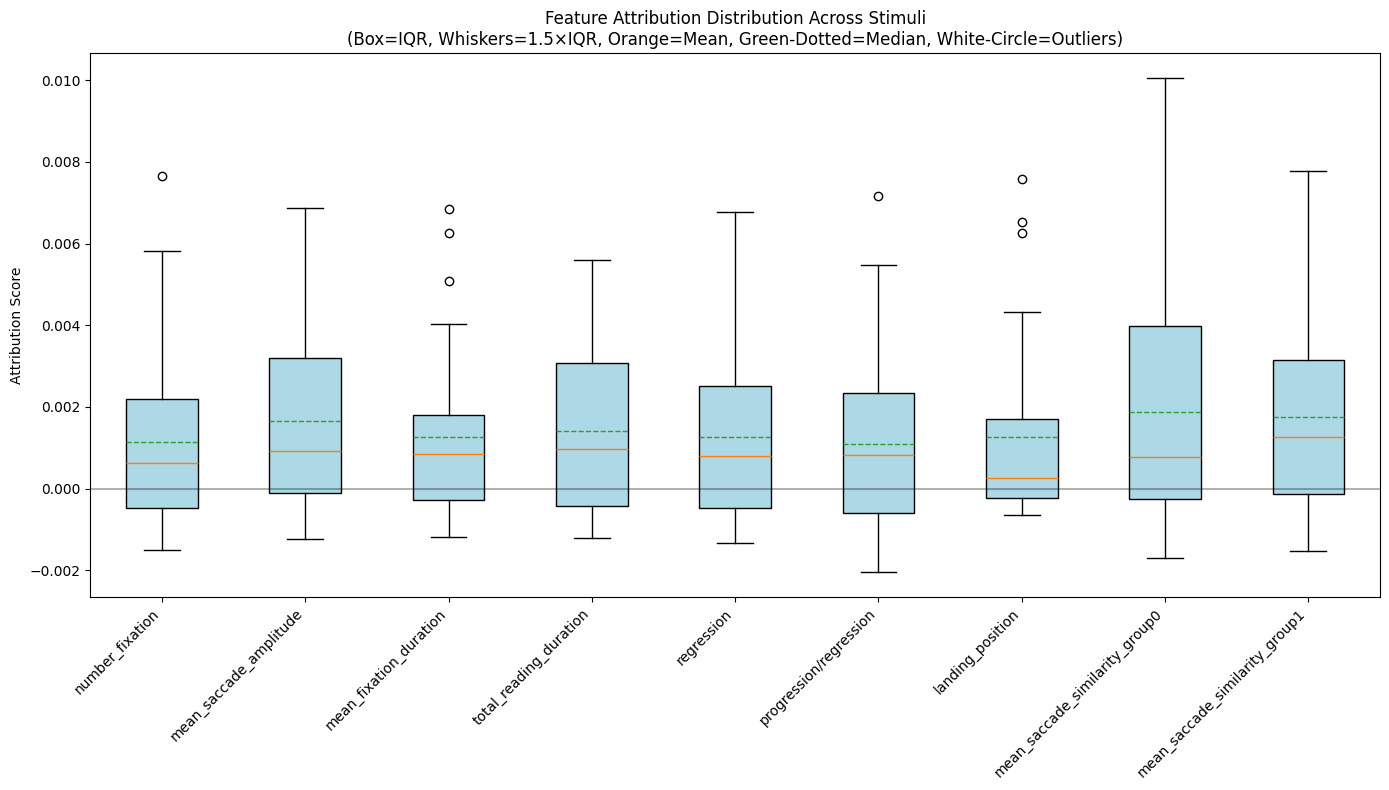


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0011, Std= 0.0022, Min=-0.0015, Max= 0.0077
mean_saccade_amplitude        : Mean= 0.0017, Std= 0.0022, Min=-0.0012, Max= 0.0069
mean_fixation_duration        : Mean= 0.0013, Std= 0.0021, Min=-0.0012, Max= 0.0068
total_reading_duration        : Mean= 0.0014, Std= 0.0021, Min=-0.0012, Max= 0.0056
regression                    : Mean= 0.0013, Std= 0.0022, Min=-0.0013, Max= 0.0068
progression/regression        : Mean= 0.0011, Std= 0.0023, Min=-0.0020, Max= 0.0072
landing_position              : Mean= 0.0013, Std= 0.0023, Min=-0.0006, Max= 0.0076
mean_saccade_similarity_group0: Mean= 0.0019, Std= 0.0028, Min=-0.0017, Max= 0.0101
mean_saccade_similarity_group1: Mean= 0.0017, Std= 0.0025, Min=-0.0015, Max= 0.0078


In [52]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original and Avg Similarity features (no mean saccade amplitude)

In [53]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 8))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_fixation_duration']
        vector_roi[s][2] = Features['total_reading_duration']
        vector_roi[s][3] = Features['regression']
        vector_roi[s][4] = Features['progression/regression']
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][3]
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][4]
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][5]

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [54]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(240, 140)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(140, 70)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(70, 35) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(35, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7014408111572266
Epoch 5 loss: 0.40563830733299255
Epoch 10 loss: 0.34735047817230225
Epoch 15 loss: 0.3145509362220764
Epoch 0 loss: 0.7668569684028625
Epoch 5 loss: 0.3879649043083191
Epoch 10 loss: 0.3343600928783417
Epoch 15 loss: 0.31702300906181335
Epoch 0 loss: 0.770248293876648
Epoch 5 loss: 0.4433397650718689
Epoch 10 loss: 0.34205907583236694
Epoch 15 loss: 0.3262498080730438
Epoch 0 loss: 0.727573573589325
Epoch 5 loss: 0.3836151659488678
Epoch 10 loss: 0.3467959761619568
Epoch 15 loss: 0.3277139663696289
Epoch 0 loss: 0.740030825138092
Epoch 5 loss: 0.4310319125652313
Epoch 10 loss: 0.3336438238620758
Epoch 15 loss: 0.33355197310447693
Epoch 0 loss: 0.6705230474472046
Epoch 5 loss: 0.4068748354911804
Epoch 10 loss: 0.3437563478946686
Epoch 15 loss: 0.317631334066391
Epoch 0 loss: 0.7360025644302368
Epoch 5 loss: 0.4415685832500458
Epoch 10 loss: 0.34628552198410034
Epoch 15 loss: 0.3219797909259796
Epoch 0 loss: 0.6621359586715698
Epoch 5 

In [55]:
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7014408111572266
Epoch 5 loss: 0.43877217173576355
Epoch 10 loss: 0.3698884844779968
Epoch 15 loss: 0.3311096727848053
Epoch 0 loss: 0.7668569684028625
Epoch 5 loss: 0.41171911358833313
Epoch 10 loss: 0.3610309660434723
Epoch 15 loss: 0.344411700963974
Epoch 0 loss: 0.770248293876648
Epoch 5 loss: 0.46959754824638367
Epoch 10 loss: 0.38339269161224365
Epoch 15 loss: 0.34873610734939575
Epoch 0 loss: 0.727573573589325
Epoch 5 loss: 0.40681883692741394
Epoch 10 loss: 0.36538028717041016
Epoch 15 loss: 0.34223672747612
Epoch 0 loss: 0.740030825138092
Epoch 5 loss: 0.4552418291568756
Epoch 10 loss: 0.35732775926589966
Epoch 15 loss: 0.35503262281417847
Epoch 0 loss: 0.6705230474472046
Epoch 5 loss: 0.4325665235519409
Epoch 10 loss: 0.36867767572402954
Epoch 15 loss: 0.33778318762779236
Epoch 0 loss: 0.7360025644302368
Epoch 5 loss: 0.468648225069046
Epoch 10 loss: 0.37864071130752563
Epoch 15 loss: 0.3474597930908203
Epoch 0 loss: 0.6621359586715698
Epoch

Approximation Error: -7.097272464307025e-05 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_63852\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


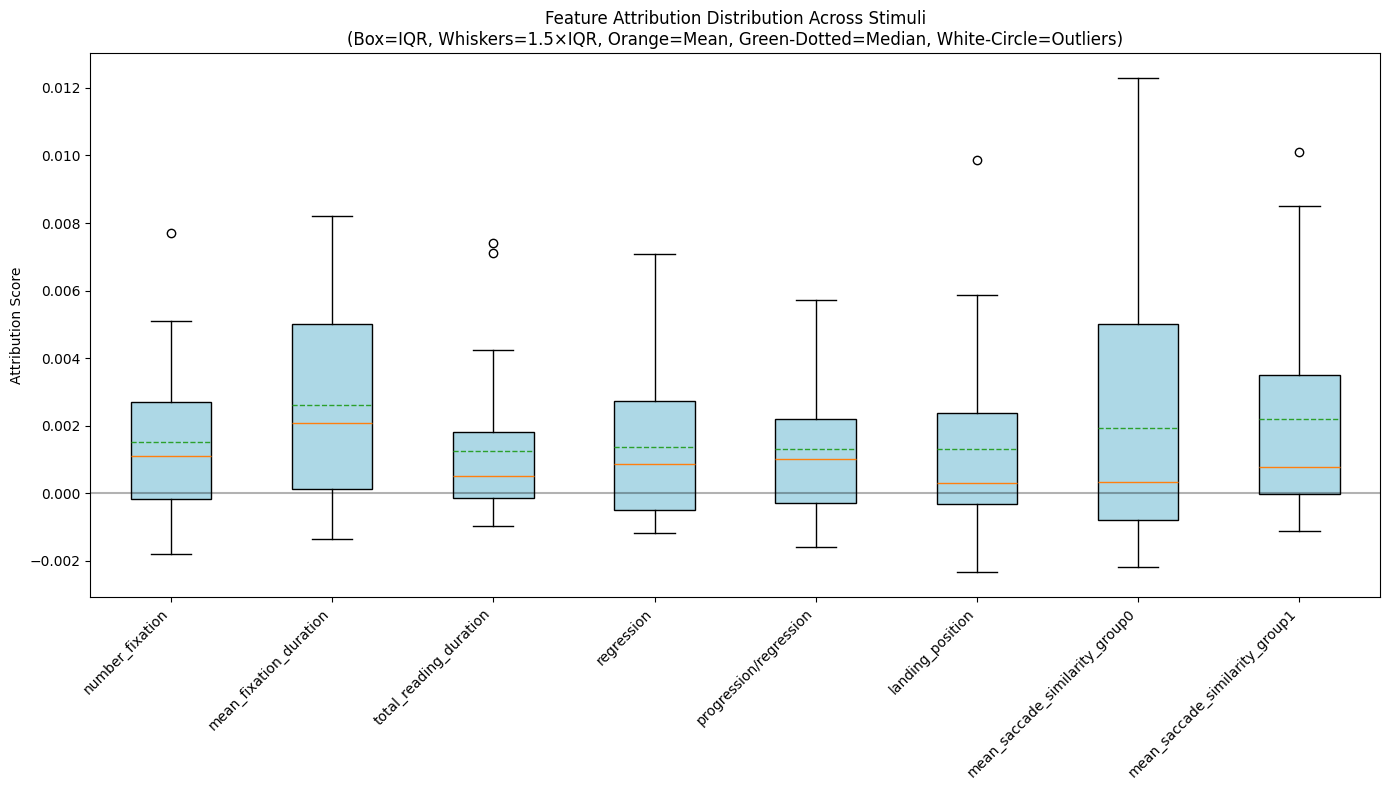


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0015, Std= 0.0022, Min=-0.0018, Max= 0.0077
mean_fixation_duration        : Mean= 0.0026, Std= 0.0028, Min=-0.0014, Max= 0.0082
total_reading_duration        : Mean= 0.0013, Std= 0.0021, Min=-0.0010, Max= 0.0074
regression                    : Mean= 0.0014, Std= 0.0023, Min=-0.0012, Max= 0.0071
progression/regression        : Mean= 0.0013, Std= 0.0021, Min=-0.0016, Max= 0.0057
landing_position              : Mean= 0.0013, Std= 0.0026, Min=-0.0023, Max= 0.0099
mean_saccade_similarity_group0: Mean= 0.0019, Std= 0.0035, Min=-0.0022, Max= 0.0123
mean_saccade_similarity_group1: Mean= 0.0022, Std= 0.0032, Min=-0.0011, Max= 0.0101


In [56]:
feature_names = [
    "number_fixation",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

In [57]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 10))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_fixation_duration']
        vector_roi[s][2] = Features['total_reading_duration']
        vector_roi[s][3] = Features['regression']
        vector_roi[s][4] = Features['progression/regression']
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1
        vector_roi[s][8] = SimAndFeatureVals[s][0][0][6] # std saccade similarity group 0
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][7] # std saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [58]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(300, 150)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(150, 75)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(75, 32) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(32, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7876787781715393
Epoch 5 loss: 0.40057024359703064
Epoch 10 loss: 0.33901116251945496
Epoch 15 loss: 0.3226650655269623
Epoch 0 loss: 0.748832643032074
Epoch 5 loss: 0.4451485574245453
Epoch 10 loss: 0.3606049120426178
Epoch 15 loss: 0.3240531384944916
Epoch 0 loss: 0.6962835788726807
Epoch 5 loss: 0.38062426447868347
Epoch 10 loss: 0.3289654552936554
Epoch 15 loss: 0.31557247042655945
Epoch 0 loss: 0.6961945295333862
Epoch 5 loss: 0.4074676036834717
Epoch 10 loss: 0.3334217369556427
Epoch 15 loss: 0.3183392882347107
Epoch 0 loss: 0.719801127910614
Epoch 5 loss: 0.40180760622024536
Epoch 10 loss: 0.33698925375938416
Epoch 15 loss: 0.3314458727836609
Epoch 0 loss: 0.7446117401123047
Epoch 5 loss: 0.41739022731781006
Epoch 10 loss: 0.35359641909599304
Epoch 15 loss: 0.3215939998626709
Epoch 0 loss: 0.7455279231071472
Epoch 5 loss: 0.38421064615249634
Epoch 10 loss: 0.3371141254901886
Epoch 15 loss: 0.3203103840351105
Epoch 0 loss: 0.7058756947517395
Epo

Approximation Error: -8.999945748655591e-06 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_63852\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


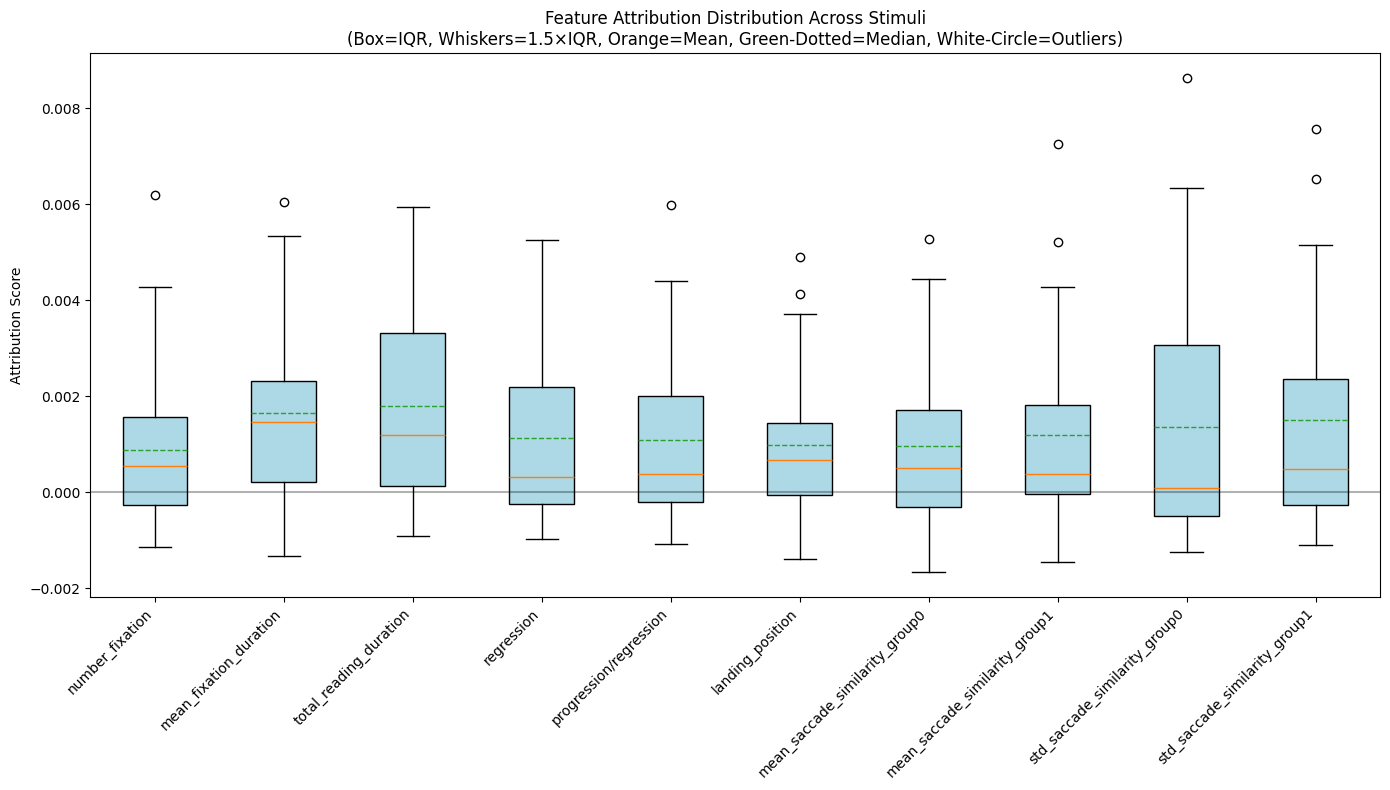


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0009, Std= 0.0016, Min=-0.0011, Max= 0.0062
mean_fixation_duration        : Mean= 0.0016, Std= 0.0018, Min=-0.0013, Max= 0.0061
total_reading_duration        : Mean= 0.0018, Std= 0.0020, Min=-0.0009, Max= 0.0059
regression                    : Mean= 0.0011, Std= 0.0018, Min=-0.0010, Max= 0.0053
progression/regression        : Mean= 0.0011, Std= 0.0018, Min=-0.0011, Max= 0.0060
landing_position              : Mean= 0.0010, Std= 0.0016, Min=-0.0014, Max= 0.0049
mean_saccade_similarity_group0: Mean= 0.0010, Std= 0.0016, Min=-0.0017, Max= 0.0053
mean_saccade_similarity_group1: Mean= 0.0012, Std= 0.0019, Min=-0.0015, Max= 0.0073
std_saccade_similarity_group0 : Mean= 0.0014, Std= 0.0026, Min=-0.0012, Max= 0.0086
std_saccade_similarity_group1 : Mean= 0.0015, Std= 0.0023, Min=-0.0011, Max= 0.0076


In [59]:
feature_names = [
    "number_fixation",
    "mean_fixation_duration", 
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### 

#### All features

In [60]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 14))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['std_fixation_duration']
        vector_roi[s][3] = Features['mean_fixation_duration']
        vector_roi[s][4] = Features['std_fixation_duration']
        vector_roi[s][5] = Features['total_reading_duration']
        vector_roi[s][6] = Features['regression']
        vector_roi[s][7] = Features['progression/regression']
        vector_roi[s][8] = Features['fixation_entropy']
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][3]
        vector_roi[s][10] = SimAndFeatureVals[s][0][0][4]
        vector_roi[s][11] = SimAndFeatureVals[s][0][0][5]
        vector_roi[s][12] = SimAndFeatureVals[s][0][0][6]
        vector_roi[s][13] = SimAndFeatureVals[s][0][0][7]
        
    
    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [61]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(420, 210)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(210, 105)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(105, 53) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(53, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.756277322769165
Epoch 5 loss: 0.41703546047210693
Epoch 10 loss: 0.3410004675388336
Epoch 15 loss: 0.32580557465553284
Epoch 0 loss: 0.7277830839157104
Epoch 5 loss: 0.39175236225128174
Epoch 10 loss: 0.326622873544693
Epoch 15 loss: 0.31387099623680115
Epoch 0 loss: 0.7621434330940247
Epoch 5 loss: 0.3925337791442871
Epoch 10 loss: 0.3417584002017975
Epoch 15 loss: 0.31421035528182983
Epoch 0 loss: 0.6861293315887451
Epoch 5 loss: 0.3877190053462982
Epoch 10 loss: 0.3375770151615143
Epoch 15 loss: 0.31559279561042786
Epoch 0 loss: 0.6796388030052185
Epoch 5 loss: 0.3500005602836609
Epoch 10 loss: 0.3256760835647583
Epoch 15 loss: 0.3139573931694031
Epoch 0 loss: 0.6991367340087891
Epoch 5 loss: 0.3835957944393158
Epoch 10 loss: 0.323445200920105
Epoch 15 loss: 0.316841721534729
Epoch 0 loss: 0.7103880643844604
Epoch 5 loss: 0.36331412196159363
Epoch 10 loss: 0.33707842230796814
Epoch 15 loss: 0.3265281021595001
Epoch 0 loss: 0.7954365611076355
Epoch 

In [62]:
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.756277322769165
Epoch 5 loss: 0.4457470774650574
Epoch 10 loss: 0.36977583169937134
Epoch 15 loss: 0.3358192443847656
Epoch 0 loss: 0.7277830839157104
Epoch 5 loss: 0.4169166684150696
Epoch 10 loss: 0.3520268201828003
Epoch 15 loss: 0.324871301651001
Epoch 0 loss: 0.7621434330940247
Epoch 5 loss: 0.39686450362205505
Epoch 10 loss: 0.3607819378376007
Epoch 15 loss: 0.3302389681339264
Epoch 0 loss: 0.6861293315887451
Epoch 5 loss: 0.4158885180950165
Epoch 10 loss: 0.36468377709388733
Epoch 15 loss: 0.33192047476768494
Epoch 0 loss: 0.6796388030052185
Epoch 5 loss: 0.37152907252311707
Epoch 10 loss: 0.35223060846328735
Epoch 15 loss: 0.32416021823883057
Epoch 0 loss: 0.6991367340087891
Epoch 5 loss: 0.4062935411930084
Epoch 10 loss: 0.34235820174217224
Epoch 15 loss: 0.334479421377182
Epoch 0 loss: 0.7103880643844604
Epoch 5 loss: 0.3827410340309143
Epoch 10 loss: 0.3550301194190979
Epoch 15 loss: 0.33428850769996643
Epoch 0 loss: 0.7954365611076355
Epoc

Approximation Error: 0.00017849511641543359 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_63852\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


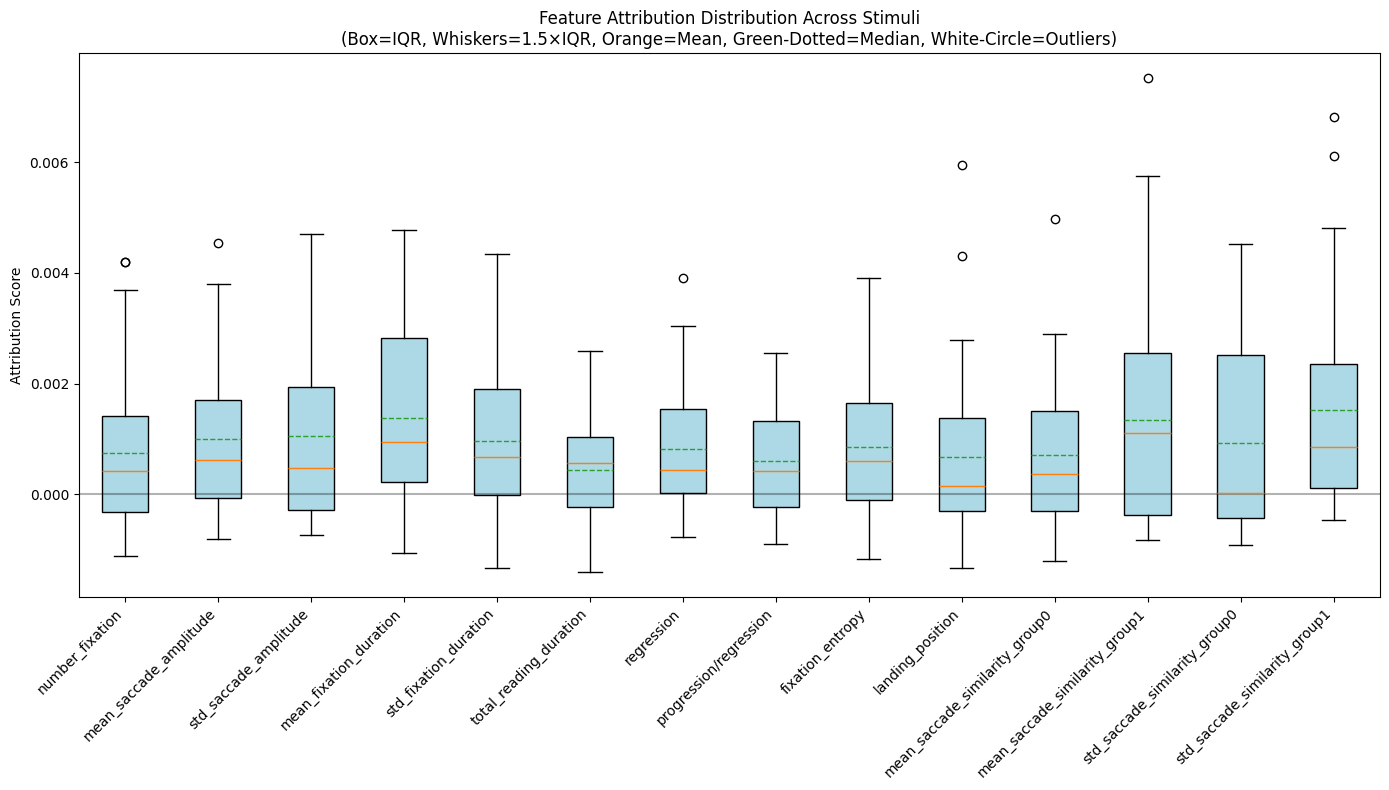


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0007, Std= 0.0014, Min=-0.0011, Max= 0.0042
mean_saccade_amplitude        : Mean= 0.0010, Std= 0.0014, Min=-0.0008, Max= 0.0045
std_saccade_amplitude         : Mean= 0.0011, Std= 0.0015, Min=-0.0007, Max= 0.0047
mean_fixation_duration        : Mean= 0.0014, Std= 0.0016, Min=-0.0011, Max= 0.0048
std_fixation_duration         : Mean= 0.0010, Std= 0.0013, Min=-0.0013, Max= 0.0043
total_reading_duration        : Mean= 0.0004, Std= 0.0009, Min=-0.0014, Max= 0.0026
regression                    : Mean= 0.0008, Std= 0.0011, Min=-0.0008, Max= 0.0039
progression/regression        : Mean= 0.0006, Std= 0.0010, Min=-0.0009, Max= 0.0026
fixation_entropy              : Mean= 0.0009, Std= 0.0013, Min=-0.0012, Max= 0.0039
landing_position              : Mean= 0.0007, Std= 0.0016, Min=-0.0013, Max= 0.0059
mean_saccade_similarity_group0: Mean= 0.0007, Std= 0.0014, Min=-0.001

In [63]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "std_saccade_amplitude",
    "mean_fixation_duration",
    "std_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "fixation_entropy",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

---

In [64]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 8))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['regression']
        vector_roi[s][2] = Features['progression/regression']
        vector_roi[s][3] = SimAndFeatureVals[s][0][0][3]
        vector_roi[s][4] = SimAndFeatureVals[s][0][0][4]
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][5] 
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][6] 
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][7]

    if vec.size != 0: 
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [65]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(240, 120)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(120, 60)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(60, 30) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(30, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    

results = train_test_pipeline(stimuli)
results = train_test_pipeline(stimuli,0.5)

Using device: cuda
Epoch 0 loss: 0.7416298985481262
Epoch 5 loss: 0.46254682540893555
Epoch 10 loss: 0.36164602637290955
Epoch 15 loss: 0.3438112139701843
Epoch 0 loss: 0.7702744603157043
Epoch 5 loss: 0.4689580798149109
Epoch 10 loss: 0.37489554286003113
Epoch 15 loss: 0.3493649959564209
Epoch 0 loss: 0.7058407068252563
Epoch 5 loss: 0.4507727324962616
Epoch 10 loss: 0.39064401388168335
Epoch 15 loss: 0.36279863119125366
Epoch 0 loss: 0.6800708770751953
Epoch 5 loss: 0.43370214104652405
Epoch 10 loss: 0.3576059341430664
Epoch 15 loss: 0.342863529920578
Epoch 0 loss: 0.7067735195159912
Epoch 5 loss: 0.4554765522480011
Epoch 10 loss: 0.40651896595954895
Epoch 15 loss: 0.3572412133216858
Epoch 0 loss: 0.6751097440719604
Epoch 5 loss: 0.42504075169563293
Epoch 10 loss: 0.36338329315185547
Epoch 15 loss: 0.3374635577201843
Epoch 0 loss: 0.7687757611274719
Epoch 5 loss: 0.471026748418808
Epoch 10 loss: 0.38303056359291077
Epoch 15 loss: 0.33201271295547485
Epoch 0 loss: 0.7596833109855652
E